## Dataset Creation
In this code, we generate 500 normal data points following a normal distribution with mean [5, 10] and standard deviation [1, 2]. Then, we introduce 50 outliers by adding noise to the data with mean [20, 30] and standard deviation [5, 8]. The dataset is then combined, and a binary target variable (Outlier) is assigned to indicate whether a data point is an outlier (1) or not (0).

The scatter plot visualizes the dataset, where outliers are shown in a different color.

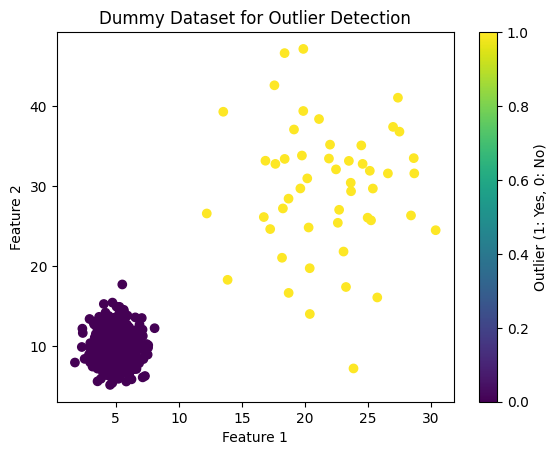

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Number of data points (normal data points and outliers)
num_data_points = 500

# Mean and standard deviation for the normal distribution
mean_normal = [5, 10]
std_normal = [1, 2]

# Generate normal data points
normal_data_points = np.random.normal(loc=mean_normal, scale=std_normal, size=(num_data_points, 2))

# Introduce outliers by adding noise to the data
outliers = np.random.normal(loc=[20, 30], scale=[5, 8], size=(50, 2))

# Combine normal data points and outliers
data = np.vstack([normal_data_points, outliers])
target = np.hstack([np.zeros(num_data_points), np.ones(50)])

# Create a DataFrame for the dataset
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df['Outlier'] = target.astype(int)

# Visualize the dataset
plt.scatter(df['Feature1'], df['Feature2'], c=df['Outlier'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dummy Dataset for Outlier Detection')
plt.colorbar(label='Outlier (1: Yes, 0: No)')
plt.show()


## Z score
In this code, we calculate the Z-scores for each data point with respect to both Feature1 and Feature2. We set a threshold value (in this case, 3) to determine outliers. Data points with a Z-score greater than the threshold in either feature are considered outliers.

The scatter plot visualizes the dataset, where normal data points are shown in blue, and the outliers detected by the Z-score method are shown in red.

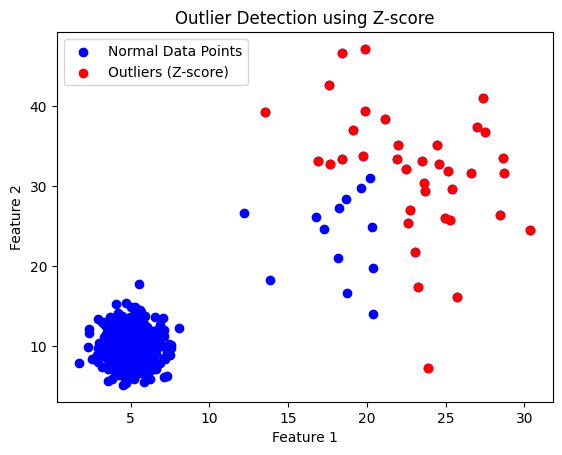

In [13]:
from scipy import stats

# Apply Z-score method for outlier detection
z_scores = np.abs(stats.zscore(df[['Feature1', 'Feature2']]))
threshold = 3  # Adjust the threshold based on your preference

# Identify outliers based on the threshold
outliers_zscore = df[(z_scores['Feature1'] > threshold) | (z_scores['Feature2'] > threshold)]

# Visualize the dataset with outliers detected by Z-score method
plt.scatter(df['Feature1'], df['Feature2'], c='blue', label='Normal Data Points')
plt.scatter(outliers_zscore['Feature1'], outliers_zscore['Feature2'], c='red', label='Outliers (Z-score)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using Z-score')
plt.legend()
plt.show()

## IQR
Let's use the same dummy dataset and apply the Interquartile Range (IQR) method for outlier detection. The IQR method is based on the range between the first quartile (Q1) and the third quartile (Q3) of the data. Data points outside a specified range (usually defined as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR) are considered outliers.

In this code, we calculate the first quartile (Q1), third quartile (Q3), and IQR for each feature (Feature1 and Feature2). We then define the outlier range as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR for each feature. Data points falling outside this range in either feature are considered outliers.

The scatter plot visualizes the dataset, where normal data points are shown in blue, and the outliers detected by the IQR method are shown in red.

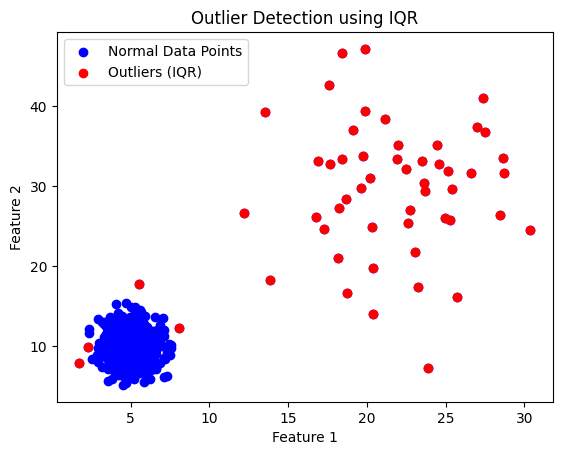

In [14]:
# Calculate Q1, Q3, and IQR for each feature
Q1 = df[['Feature1', 'Feature2']].quantile(0.25)
Q3 = df[['Feature1', 'Feature2']].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range based on IQR
outlier_range_lower = Q1 - 1.5 * IQR
outlier_range_upper = Q3 + 1.5 * IQR

# Identify outliers based on the IQR range
outliers_iqr = df[
    (df['Feature1'] < outlier_range_lower['Feature1']) |
    (df['Feature1'] > outlier_range_upper['Feature1']) |
    (df['Feature2'] < outlier_range_lower['Feature2']) |
    (df['Feature2'] > outlier_range_upper['Feature2'])
]

# Visualize the dataset with outliers detected by IQR method
plt.scatter(df['Feature1'], df['Feature2'], c='blue', label='Normal Data Points')
plt.scatter(outliers_iqr['Feature1'], outliers_iqr['Feature2'], c='red', label='Outliers (IQR)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using IQR')
plt.legend()
plt.show()


## OneClassSVM
Let's continue with the same dummy dataset and apply the One-Class SVM method for outlier detection. One-Class SVM is a machine learning algorithm that is useful for novelty detection, where the goal is to identify data points that deviate significantly from the majority of the data.

In this code, we fit the One-Class SVM model to the combined feature array X, which contains both Feature1 and Feature2. The nu hyperparameter controls the fraction of data points considered as outliers by the model. You can adjust the nu value based on your preference and the nature of your data.

The ocsvm.predict(X) method returns an array of predictions, where -1 indicates an outlier and 1 indicates an inlier. We convert the predictions to boolean values, where True represents an outlier and False represents an inlier.

The scatter plot visualizes the dataset, where normal data points are shown in blue, and the outliers detected by the One-Class SVM method are shown in red.

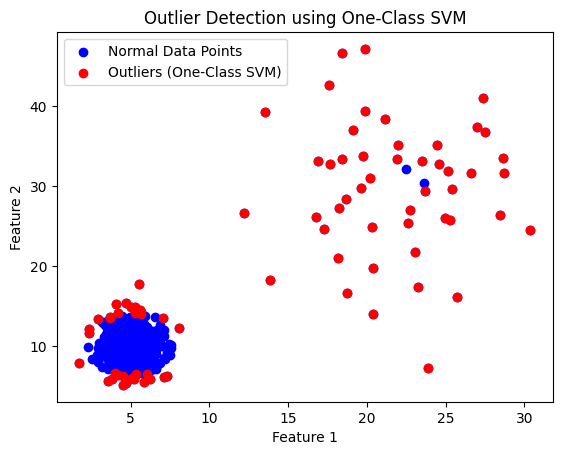

In [37]:
from sklearn.svm import OneClassSVM

# Combine the features into a single array
X = df[['Feature1', 'Feature2']].values

# Fit the One-Class SVM model
ocsvm = OneClassSVM(nu=0.15)  # Adjust the hyperparameter 'nu' based on your preference
ocsvm.fit(X)

# Predict outliers using the One-Class SVM model
outliers_ocsvm = ocsvm.predict(X)
outliers_ocsvm = outliers_ocsvm == -1  # Convert -1 to True (outlier), 1 to False (inlier)

# Visualize the dataset with outliers detected by One-Class SVM method
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal Data Points')
plt.scatter(X[outliers_ocsvm, 0], X[outliers_ocsvm, 1], c='red', label='Outliers (One-Class SVM)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using One-Class SVM')
plt.legend()
plt.show()


## Isolation Forest
Let's continue with the same dummy dataset and apply the Isolation Forest method for outlier detection. The Isolation Forest algorithm is another popular unsupervised outlier detection technique based on the concept of isolating anomalies (outliers) in the data.

In this code, we fit the Isolation Forest model to the combined feature array X, which contains both Feature1 and Feature2. The contamination parameter controls the expected proportion of outliers in the data. You can adjust the contamination value based on your preference and the nature of your data.

The isolation_forest.predict(X) method returns an array of predictions, where -1 indicates an outlier and 1 indicates an inlier. We convert the predictions to boolean values, where True represents an outlier and False represents an inlier.

The scatter plot visualizes the dataset, where normal data points are shown in blue, and the outliers detected by the Isolation Forest method are shown in red.

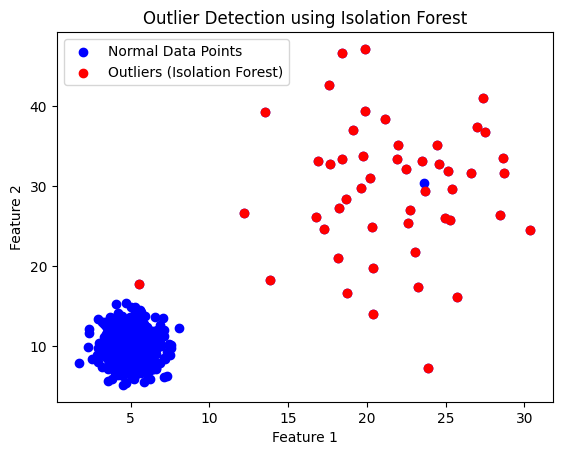

In [31]:
from sklearn.ensemble import IsolationForest

# Combine the features into a single array
X = df[['Feature1', 'Feature2']].values

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.09)  # Adjust the contamination parameter based on your preference
isolation_forest.fit(X)

# Predict outliers using the Isolation Forest model
outliers_isolation_forest = isolation_forest.predict(X)
outliers_isolation_forest = outliers_isolation_forest == -1  # Convert -1 to True (outlier), 1 to False (inlier)

# Visualize the dataset with outliers detected by Isolation Forest method
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal Data Points')
plt.scatter(X[outliers_isolation_forest, 0], X[outliers_isolation_forest, 1], c='red', label='Outliers (Isolation Forest)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using Isolation Forest')
plt.legend()
plt.show()


## DBSCAN
Let's continue with the same dummy dataset and apply the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm for outlier detection. DBSCAN is a density-based clustering algorithm that can be used for outlier detection by identifying points that are not part of any dense cluster.

In this code, we fit the DBSCAN model to the combined feature array X, which contains both Feature1 and Feature2. The eps parameter defines the maximum distance between two samples for them to be considered as part of the same cluster. The min_samples parameter specifies the minimum number of samples in a neighborhood for a point to be considered as a core point.

The dbscan.labels_ attribute contains the cluster labels assigned by DBSCAN. Points that are not part of any cluster are assigned the label -1, which indicates outliers.

The scatter plot visualizes the dataset, where normal data points are shown in blue, and the outliers detected by the DBSCAN algorithm are shown in red.


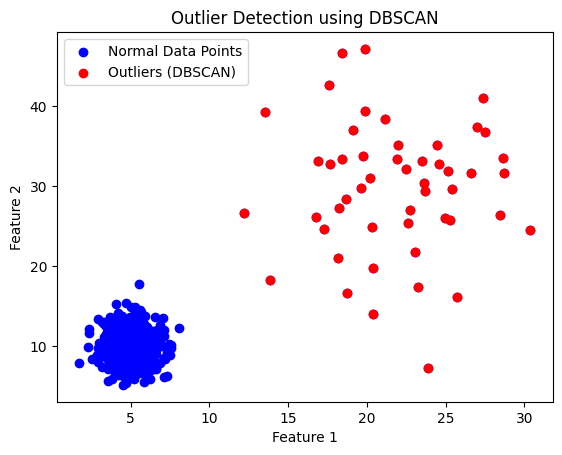

In [25]:
from sklearn.cluster import DBSCAN

# Combine the features into a single array
X = df[['Feature1', 'Feature2']].values

# Fit the DBSCAN model
dbscan = DBSCAN(eps=2.5, min_samples=10)  # Adjust the hyperparameters 'eps' and 'min_samples' based on your preference
dbscan.fit(X)

# Identify outliers based on the DBSCAN clustering results
outliers_dbscan = dbscan.labels_ == -1  # DBSCAN assigns -1 to outliers

# Visualize the dataset with outliers detected by DBSCAN
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal Data Points')
plt.scatter(X[outliers_dbscan, 0], X[outliers_dbscan, 1], c='red', label='Outliers (DBSCAN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using DBSCAN')
plt.legend()
plt.show()


## LOF
Let's continue with the same dummy dataset and apply the Local Outlier Factor (LOF) method for outlier detection. LOF is a density-based outlier detection method that measures the local density deviation of a data point with respect to its neighbors. Outliers are identified as data points with significantly lower local density compared to their neighbors.

In this code, we fit the Local Outlier Factor (LOF) model to the combined feature array X, which contains both Feature1 and Feature2. The n_neighbors parameter defines the number of neighbors considered for calculating the local density deviation of each data point. The contamination parameter controls the expected proportion of outliers in the data.

The lof.fit_predict(X) method returns an array of predictions, where -1 indicates an outlier and 1 indicates an inlier. We convert the predictions to boolean values, where True represents an outlier and False represents an inlier.

The scatter plot visualizes the dataset, where normal data points are shown in blue, and the outliers detected by the LOF method are shown in red.

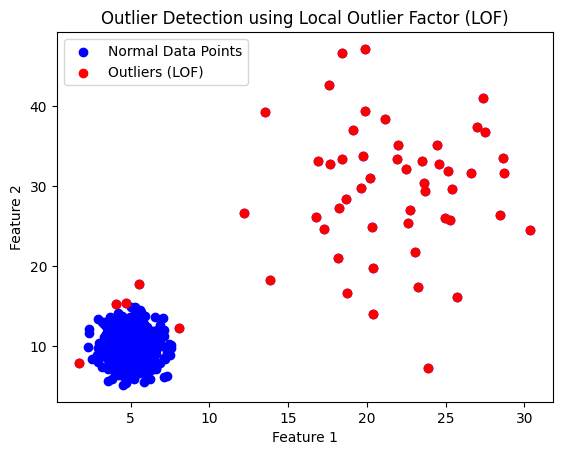

In [56]:
from sklearn.neighbors import LocalOutlierFactor

# Combine the features into a single array
X = df[['Feature1', 'Feature2']].values

# Fit the LOF model
lof = LocalOutlierFactor(n_neighbors=100, contamination=0.10)  # Adjust the hyperparameters based on your preference
outliers_lof = lof.fit_predict(X)

# Identify outliers based on the LOF scores
outliers_lof = outliers_lof == -1  # LOF assigns -1 to outliers

# Visualize the dataset with outliers detected by LOF
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal Data Points')
plt.scatter(X[outliers_lof, 0], X[outliers_lof, 1], c='red', label='Outliers (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using Local Outlier Factor (LOF)')
plt.legend()
plt.show()
